In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('telco-customer-churn.csv')

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Replace empty spaces with NaN for consistency
df.replace(" ", np.nan, inplace=True)

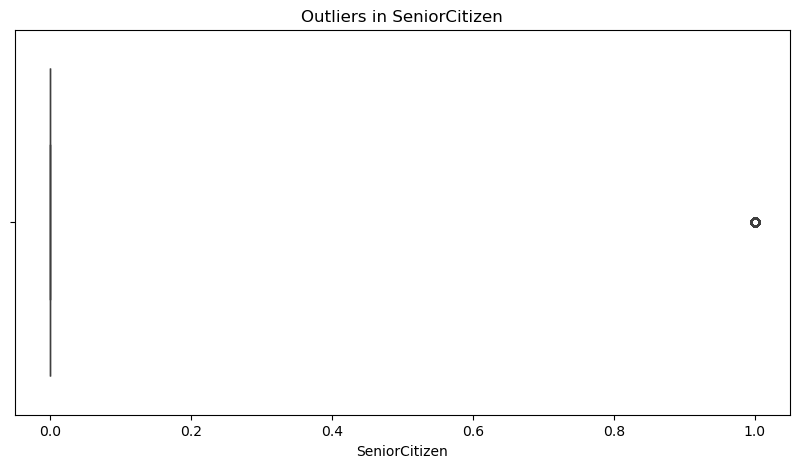

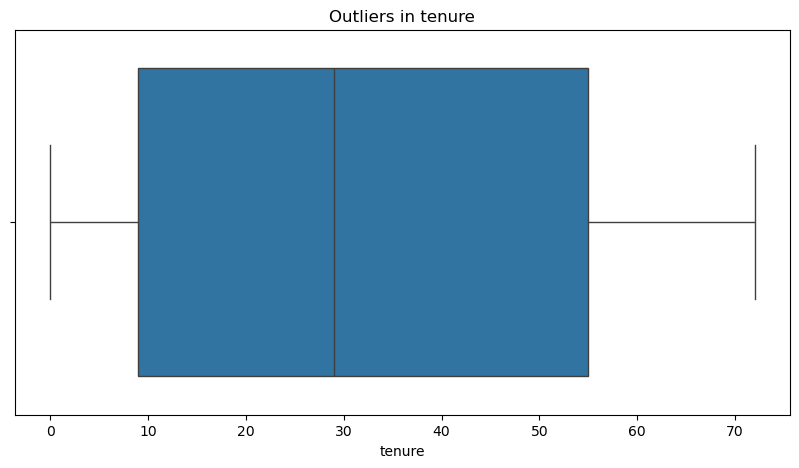

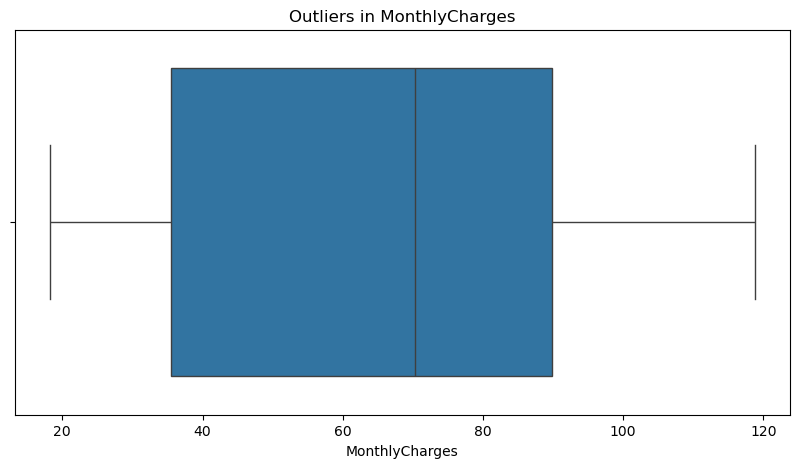

In [ ]:
# Check for outliers using boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

In [ ]:
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Scale numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Check final dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [ ]:
# Display data types
print("Data Types:")
print(df.dtypes.value_counts())
print("\nCategorical Columns:", df.select_dtypes(include=['object']).columns.tolist())
print("Numeric Columns:", df.select_dtypes(include=['float64', 'int64']).columns.tolist())

Data Types:
int32      18
float64     3
Name: count, dtype: int64

Categorical Columns: []
Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


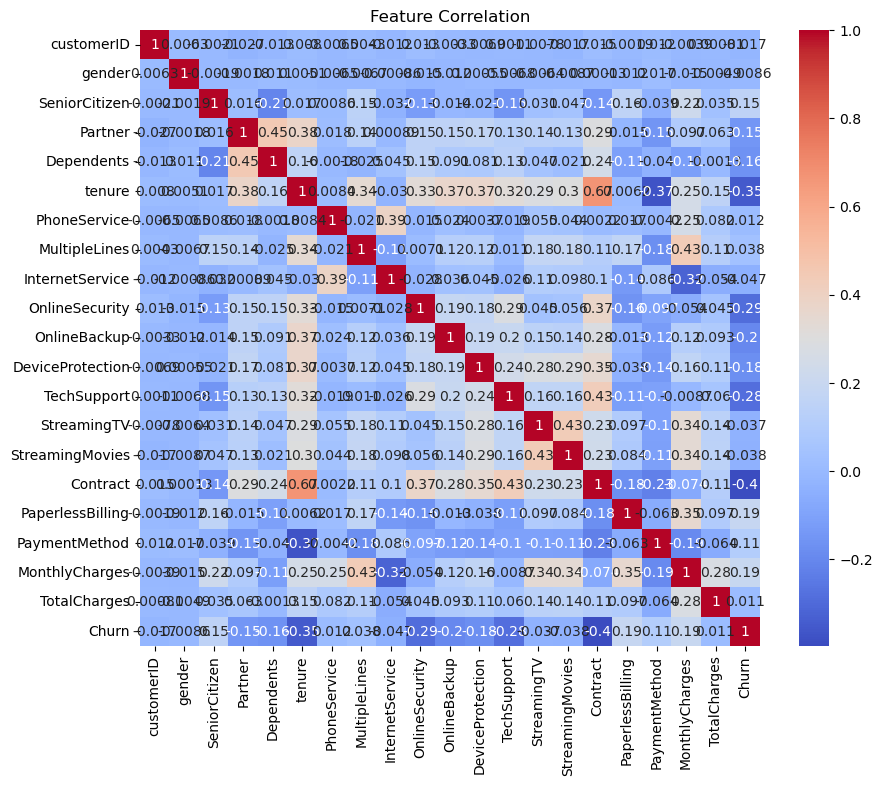

In [ ]:
# Correlation matrix to check dependencies
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
# Feature importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Churn', axis=1)
y = df['Churn']
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Top Important Features:")
print(feature_importance.head(10))

Top Important Features:
            Feature  Importance
5            tenure    0.162021
18   MonthlyCharges    0.145686
19     TotalCharges    0.134666
0        customerID    0.128681
15         Contract    0.073974
9    OnlineSecurity    0.046331
17    PaymentMethod    0.046155
12      TechSupport    0.034918
10     OnlineBackup    0.028629
8   InternetService    0.024432


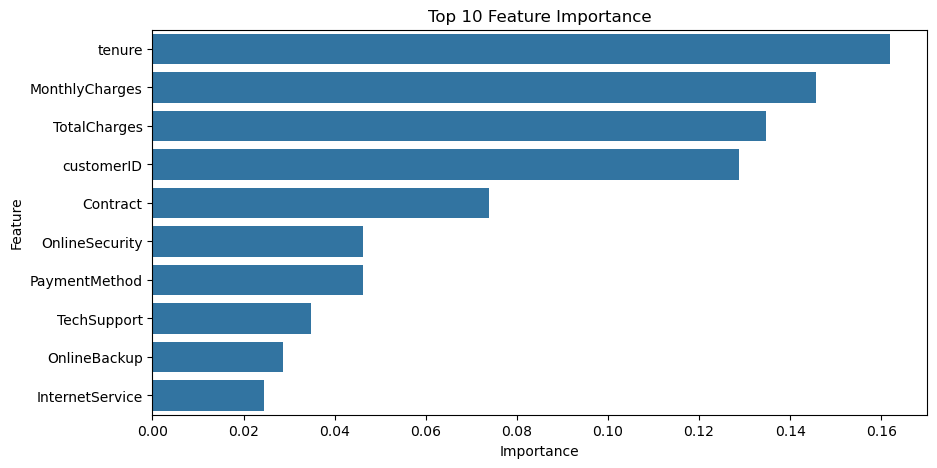

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Feature Importance")
plt.show()

In [ ]:
import sweetviz as sv

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SweetViz to compare datasets
train_test_compare = sv.compare([X_train, "Training Data"], [X_test, "Test Data"])
train_test_compare.show_html('train_test_comparison.html')

                                             |          | [  0%]   00:00 -> (? left)

Report train_test_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Dataset limitations
print("Limitations and Issues:")
print("1. The dataset may have class imbalance as the churn rate could be lower compared to non-churners.")
print("2. Feature scaling might be needed for models sensitive to feature magnitudes.")
print("3. SMOTE (Synthetic Minority Over-sampling Technique) will need to be applied to balance the churn classes.")

Limitations and Issues:
1. The dataset may have class imbalance as the churn rate could be lower compared to non-churners.
2. Feature scaling might be needed for models sensitive to feature magnitudes.
3. SMOTE (Synthetic Minority Over-sampling Technique) will need to be applied to balance the churn classes.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# Load dataset
data = pd.read_csv('telco-customer-churn.csv')  # Replace with your file path

In [ ]:
# Preprocess dataset
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
data = pd.get_dummies(data)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define function for model evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

In [ ]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes Performance:")
evaluate_model(y_test, y_pred_nb)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Performance:")
evaluate_model(y_test, y_pred_lr)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
evaluate_model(y_test, y_pred_rf)

# XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgboost = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
evaluate_model(y_test, y_pred_xgboost)


Naive Bayes Performance:
Accuracy: 0.2803406671398155
Precision: 0.2588412340105342
Recall: 0.9222520107238605
F1 Score: 0.40423031727379555

Logistic Regression Performance:
Accuracy: 0.7806955287437899
Precision: 0.7051282051282052
Recall: 0.2949061662198391
F1 Score: 0.4158790170132325

Random Forest Performance:
Accuracy: 0.7955997161107168
Precision: 0.6640926640926641
Recall: 0.46112600536193027
F1 Score: 0.5443037974683544


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.7899219304471257
Precision: 0.6214511041009464
Recall: 0.5281501340482574
F1 Score: 0.5710144927536231


In [ ]:
# Define function for model evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

In [ ]:
# Original Dataset - Model Training and Evaluation
print("Original Dataset Performance:")

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes Performance:")
evaluate_model(y_test, y_pred_nb)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Performance:")
evaluate_model(y_test, y_pred_lr)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
evaluate_model(y_test, y_pred_rf)

# XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgboost = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
evaluate_model(y_test, y_pred_xgboost)

Original Dataset Performance:

Naive Bayes Performance:
Accuracy: 0.2803406671398155
Precision: 0.2588412340105342
Recall: 0.9222520107238605
F1 Score: 0.40423031727379555

Logistic Regression Performance:
Accuracy: 0.7806955287437899
Precision: 0.7051282051282052
Recall: 0.2949061662198391
F1 Score: 0.4158790170132325

Random Forest Performance:
Accuracy: 0.7955997161107168
Precision: 0.6640926640926641
Recall: 0.46112600536193027
F1 Score: 0.5443037974683544


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.7899219304471257
Precision: 0.6214511041009464
Recall: 0.5281501340482574
F1 Score: 0.5710144927536231


In [ ]:
# Apply SMOTE to address data imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# SMOTE Dataset - Model Training and Evaluation
print("\nSMOTE Dataset Performance:")

# Naive Bayes Model with SMOTE
nb_model.fit(X_train_smote, y_train_smote)
y_pred_nb_smote = nb_model.predict(X_test)
print("\nNaive Bayes Performance (SMOTE):")
evaluate_model(y_test, y_pred_nb_smote)

# Logistic Regression Model with SMOTE
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_model.predict(X_test)
print("\nLogistic Regression Performance (SMOTE):")
evaluate_model(y_test, y_pred_lr_smote)

# Random Forest Model with SMOTE
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model.predict(X_test)
print("\nRandom Forest Performance (SMOTE):")
evaluate_model(y_test, y_pred_rf_smote)

# XGBoost Model with SMOTE
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgboost_smote = xgb_model.predict(X_test)
print("\nXGBoost Performance (SMOTE):")
evaluate_model(y_test, y_pred_xgboost_smote)


SMOTE Dataset Performance:

Naive Bayes Performance (SMOTE):
Accuracy: 0.2803406671398155
Precision: 0.2588412340105342
Recall: 0.9222520107238605
F1 Score: 0.40423031727379555

Logistic Regression Performance (SMOTE):
Accuracy: 0.7814052519517388
Precision: 0.6923076923076923
Recall: 0.3136729222520107
F1 Score: 0.4317343173431734

Random Forest Performance (SMOTE):
Accuracy: 0.7885024840312278
Precision: 0.6506024096385542
Recall: 0.4343163538873995
F1 Score: 0.5209003215434084


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:36:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance (SMOTE):
Accuracy: 0.7899219304471257
Precision: 0.6222222222222222
Recall: 0.5254691689008043
F1 Score: 0.5697674418604651


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train and y_train are your training features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")


Naive Bayes model trained.
Logistic Regression model trained.
Random Forest model trained.


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:40:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model trained.


In [ ]:
# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")


Naive Bayes Model Evaluation:
Accuracy: 0.2803
Precision: 0.2588
Recall: 0.9223
F1 Score: 0.4042

Logistic Regression Model Evaluation:
Accuracy: 0.8247
Precision: 0.6994
Recall: 0.5925
F1 Score: 0.6415

Random Forest Model Evaluation:
Accuracy: 0.7956
Precision: 0.6693
Recall: 0.4504
F1 Score: 0.5385

XGBoost Model Evaluation:
Accuracy: 0.7899
Precision: 0.6215
Recall: 0.5282
F1 Score: 0.5710



In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='recall')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Recall Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score: 0.4439
